In [ ]:
import json

In [5]:
with open ("data/user_similar_projects_E5.json", 'r') as file:
    data_e5 = json.load(file)
with open ("data/user_similar_projects_LABSE.json", 'r') as file:
    data_labse = json.load(file)
with open ("data/user_similar_projects_v6.json", 'r') as file:
    data_v6 = json.load(file)

## create graph

In [34]:
import matplotlib.pyplot as plt
import networkx as nx

def create_graph(data: dict, profile_id: str):
    G = nx.Graph()
    G.add_node(f"p_{profile_id}")
    for project, match_info in data[profile_id]['projects'].items():
        project_node = G.add_node(f"r_{project}")
        total_score = 0
        for score in match_info['sentences'].values():
            total_score += score
            
        G.add_edge(f"p_{profile_id}", f"r_{project}", weight=round(total_score, 2))
        
    elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] > 1]
    esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d["weight"] <= 1]

    pos = nx.spring_layout(G, seed=7)

    # edges
    nx.draw_networkx_edges(G, pos, edgelist=elarge, width=6)
    nx.draw_networkx_edges(
        G, pos, edgelist=esmall, width=3, alpha=0.5, edge_color="b", style="dashed"
    )

    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=700, node_color="white")

    # node labels
    nx.draw_networkx_labels(G, pos, font_size=8, font_family="sans-serif")
    # edge weight labels
    edge_labels = nx.get_edge_attributes(G, "weight")
    nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=10)

    ax = plt.gca()
    ax.margins(0.08)
    plt.axis("off")
    plt.tight_layout()
    plt.show()

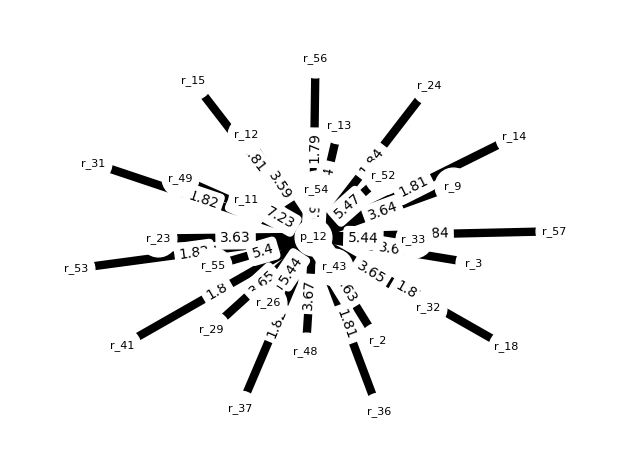

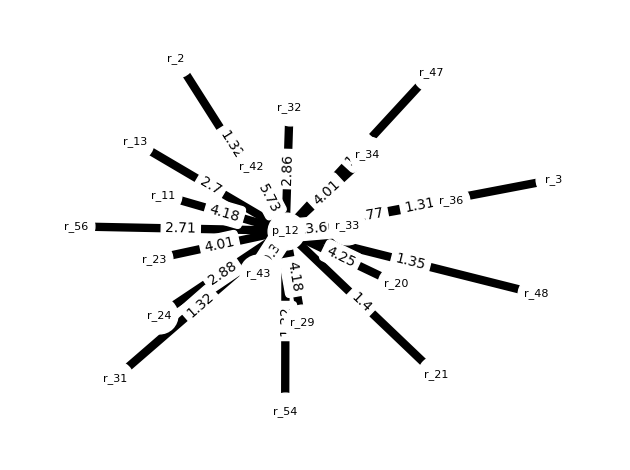

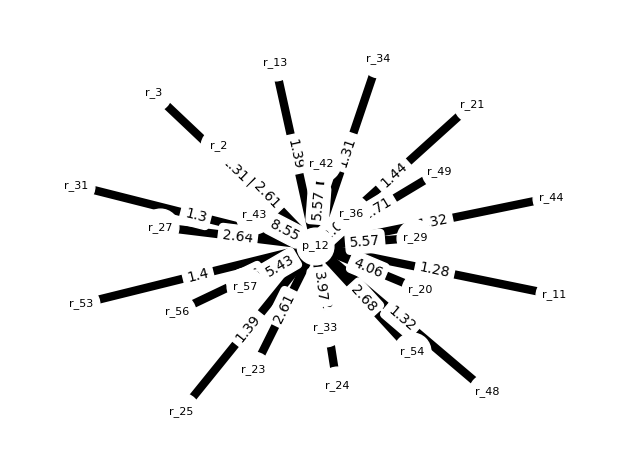

In [39]:
profile_id = "12"

create_graph(data_e5, profile_id)
create_graph(data_labse, profile_id)
create_graph(data_v6, profile_id)

In [40]:
data_e5
data_labse
data_v6

{'1': {'about': 'My work takes inspiration from anthropology, data science and posthuman design. Through structured methodological research I reveal opportunities for creativity, synthesizing user insights and opening up design avenues.',
  'projects': {'33': {'numero_di_match': 6,
    'sentences': {'Then, we will take the materials and stories that have emerged and examine them in an improvisational work where the “body in movement” becomes the subject, the object and the tool of the research.': 2.9283123,
     'The project is based on an intensive collaboration between a dancer and a philosopher to explore the question of desire, in its multiple links to practices of recognition.\n': 1.4092598,
     'This exchange between choreographic research, on the one hand, and philosophical research, on the other, aims to generate a new understanding of desire and relationships, experimenting with new ways of knowing through words and dance, and creating a choreography.\n': 2.8383162,
     'The

In [63]:
result = list()
for project, match_info in data_labse[profile_id]['projects'].items():
    
    total_score = 0
    for score in match_info['sentences'].values():
        total_score += score
        
    result.append((project, total_score))

In [64]:
dict(sorted(result, key=lambda item: item[1], reverse=True))

{'33': 13.658336700000001,
 '43': 10.3069665,
 '42': 5.729979,
 '20': 4.247173,
 '29': 4.1754275000000005,
 '11': 4.1754275000000005,
 '34': 4.0146818,
 '23': 4.0112685,
 '24': 2.877229,
 '32': 2.8551093,
 '36': 2.7726451,
 '56': 2.7077956,
 '13': 2.6960102,
 '21': 1.39878,
 '48': 1.3518646,
 '54': 1.322355,
 '2': 1.3178256,
 '31': 1.3172716,
 '3': 1.3122689,
 '47': 1.2902778}